<a href="https://colab.research.google.com/github/MayongSu/Final-Project/blob/main/1301184514_1301184139_Final_Project_Big_Data_%26_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen Pelanggan**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Cloud Warehouse Compersion Chart.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Expense IIGF.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore")
import holidays


In [ ]:
Amazon_df = pd.read_csv("/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv")
Cloud_Warehouse_df = pd.read_csv("/kaggle/input/unlock-profits-with-e-commerce-sales-data/Cloud Warehouse Compersion Chart.csv")
Expense_df = pd.read_csv("/kaggle/input/unlock-profits-with-e-commerce-sales-data/Expense IIGF.csv")
international_sale_report_df = pd.read_csv("/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv")
May2022_df = pd.read_csv("/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv")
PLMarch2021_df = pd.read_csv("/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv")
Sale_report_df = pd.read_csv("/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv")

# **1. Amazon Sale Report:**
* ## Analyze sales trends for products sold on Amazon.
* ##  Compare sales performance before and after major holidays or sales events.

In [ ]:
Amazon_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
Amazon_df["Qty"]

0         0
1         1
2         1
3         0
4         1
         ..
128970    1
128971    1
128972    1
128973    1
128974    1
Name: Qty, Length: 128975, dtype: int64

In [ ]:
Amazon_df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
Amazon_df['Date'] = pd.to_datetime(Amazon_df['Date'])
daily_sales = Amazon_df.groupby('Date').agg(total_qty=('Qty', 'sum'), total_amount=('Amount', 'sum')).reset_index()
daily_sales

,Date,total_qty,total_amount
0,2022-03-31,156,101683.85
1,2022-04-01,1319,865478.60
2,2022-04-02,1408,913101.53
3,2022-04-03,1544,1011763.38
4,2022-04-04,1331,882059.17
...,...,...,...
86,2022-06-25,940,654234.58
87,2022-06-26,1122,773610.02
88,2022-06-27,1023,714124.67
89,2022-06-28,1104,772085.53


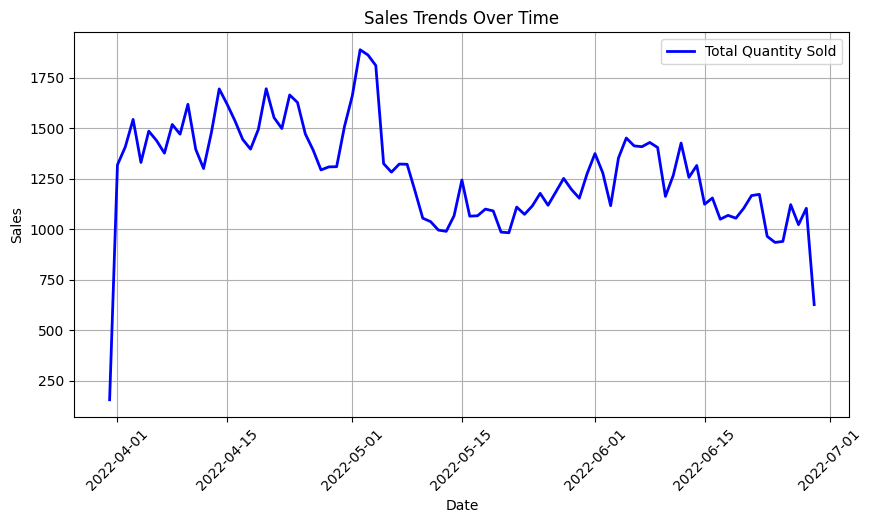

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sales, x='Date', y='total_qty', label='Total Quantity Sold', color='blue', linewidth=2)


plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

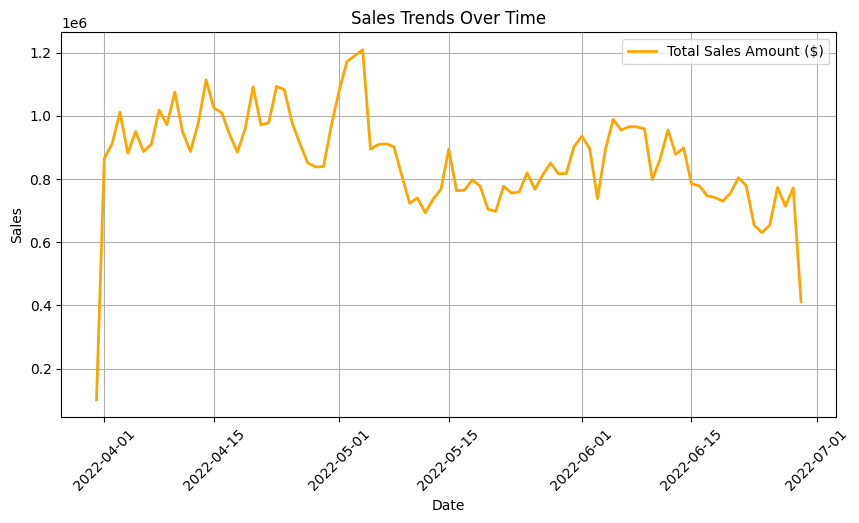

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_sales, x='Date', y='total_amount', label='Total Sales Amount ($)', color='orange', linewidth=2)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
us_holidays = holidays.US(years=[2022, 2023])
Amazon_df['Is_Holiday'] = Amazon_df['Date'].isin(us_holidays)
Amazon_df['Day_of_Week'] = Amazon_df['Date'].dt.day_name()
Amazon_df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Is_Holiday,Day_of_Week
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,False,Saturday
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,False,Saturday
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,False,Saturday
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,False,Saturday
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,False,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False,False,Tuesday
128971,128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,False,Tuesday
128972,128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False,False,Tuesday
128973,128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,False,Tuesday


In [ ]:
us_holidays = holidays.US(years=[2022, 2023])
Amazon_df['Is_Holiday'] = Amazon_df['Date'].apply(lambda x: x.date() in us_holidays)

def categorize_sales(date):
    if date.date() in us_holidays:
        return 'Holiday'
    elif date.date() < min(us_holidays.keys()):
        return 'Before Holiday'
    else:
        return 'After Holiday'

In [ ]:
Amazon_df['Holiday_Status'] = Amazon_df['Date'].apply(categorize_sales)

sales_by_holiday = Amazon_df.groupby('Holiday_Status').agg(total_qty=('Qty', 'sum'),total_amount=('Amount', 'sum')).reset_index()


fig = px.bar(sales_by_holiday, x='Holiday_Status', y=['total_qty', 'total_amount'],
             title='Sales Performance Before, During, and After Holidays',
             labels={'value': 'Sales', 'Holiday_Status': 'Holiday Status'},
             barmode='group', height=600)

# Show the plot
fig.show()

In [ ]:
IQR = Amazon_df['Amount'].quantile(0.75) - Amazon_df['Amount'].quantile(0.25)
1.5*IQR
upper_bound = Amazon_df['Amount'].quantile(0.75) + 1.5*IQR
lower_bound = Amazon_df['Amount'].quantile(0.25) - 1.5*IQR

Median = Amazon_df['Amount'].median()
Amazon_df['Amount'] = Amazon_df['Amount'].apply(lambda x: Median if x > upper_bound  or x < lower_bound else x)
Amazon_df['Amount'] = Amazon_df['Amount'].apply(lambda x: Median if x == 0 else x)

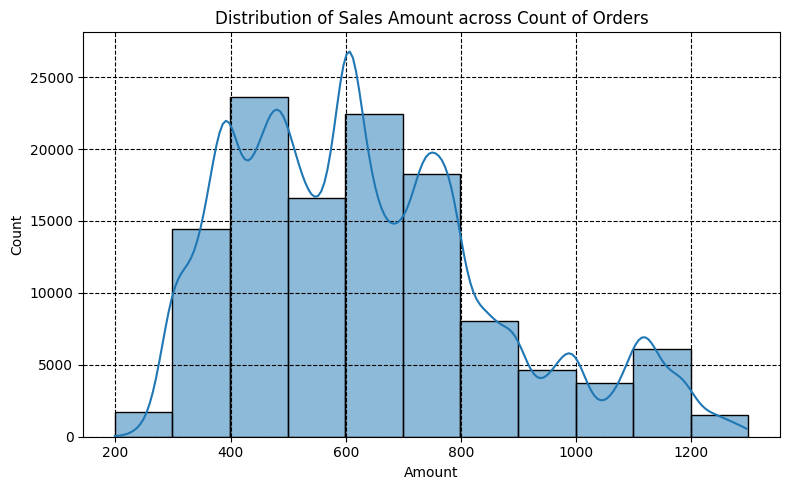

In [ ]:
fig, my_ax = plt.subplots(figsize=(8,5))

sns.histplot(data = Amazon_df['Amount'], ax=my_ax, binwidth=100, kde=True)
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Count of Orders")
plt.tight_layout()

In [ ]:
Top5_Trending_product=Amazon_df.groupby('Category')['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(5)
Top5_Trending_product

,Amount
Category,
Set,36935117.71
kurta,21786561.22
Western Dress,11304814.12
Top,5446284.30
Ethnic Dress,795621.66


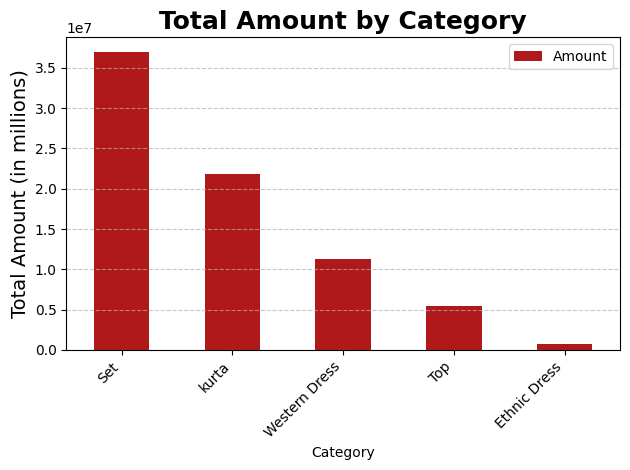

In [ ]:
Top5_Trending_product.plot(kind='bar',color='#b01919')
plt.title('Total Amount by Category', fontsize=18, weight='bold')
plt.ylabel('Total Amount (in millions)', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# **2. Cloud Warehouse Comparison:**
* ##  Compare inventory levels and sales data across different cloud warehouses.
* ##  Identify the most efficient warehouse in terms of sales turnover and inventory management.

In [ ]:
Cloud_Warehouse_df.head(10)

,index,Shiprocket,Unnamed: 1,INCREFF
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11
3,3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,4,Customer Return with Detailed QC,₹6.00,15.5
5,5,(A) SCOPE OF WORK and STANDARD OPERATING PROCE...,NaN,NaN
6,6,Inward,Unloading,• Boxes counted and weighed. Data captured in ...
7,7,NaN,Validation,• GRN will be initiated against a valid PO doc...
8,8,NaN,QC,• No QC to be done (Outer Visual Inspection an...
9,9,NaN,GRN,• Scanning (Goods will have scannable EAN cod...


In [ ]:
Cloud_Warehouse_df.columns

Index(['index', 'Shiprocket', 'Unnamed: 1', 'INCREFF'], dtype='object')

In [ ]:
Cloud_Warehouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       50 non-null     int64 
 1   Shiprocket  21 non-null     object
 2   Unnamed: 1  41 non-null     object
 3   INCREFF     28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [ ]:
# Clean price and sales columns, converting them to numeric
Cloud_Warehouse_df['Price'] = pd.to_numeric(Cloud_Warehouse_df['Unnamed: 1'].str.replace('₹', '').str.extract('(\d+\.\d+|\d+)')[0], errors='coerce')
Cloud_Warehouse_df['Sales'] = pd.to_numeric(Cloud_Warehouse_df['INCREFF'].str.extract('(\d+\.\d+|\d+)')[0], errors='coerce')

filtered_df = Cloud_Warehouse_df.dropna(subset=['Price', 'Sales'], how='all').reset_index(drop=True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       16 non-null     int64  
 1   Shiprocket  11 non-null     object 
 2   Unnamed: 1  16 non-null     object 
 3   INCREFF     12 non-null     object 
 4   Price       8 non-null      float64
 5   Sales       12 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 896.0+ bytes


In [ ]:
# Group the filtered data to calculate inventory and sales totals
summary = filtered_df.groupby('Shiprocket').agg(total_inventory_value=('Price', 'sum'),total_sales=('Sales', 'sum')).reset_index()
print(summary)

                          Shiprocket  total_inventory_value  total_sales
0                  Allowed Shrinkage                    0.0         0.20
1                Customer Complaints                    0.0         0.20
2   Customer Return with Detailed QC                    6.0        15.50
3          Daily Processing Capacity                   11.0         0.00
4      Inbound (Fresh Stock and RTO)                    4.0         4.00
5               Inventory management                    0.0         3.00
6                  Monthly Fill Rate                    0.0        99.80
7                             Others                    0.0         7.00
8                           Outbound                    7.0        11.00
9                            Penalty                    0.0         2.00
10                   Storage Fee/Cft                   25.0         0.15


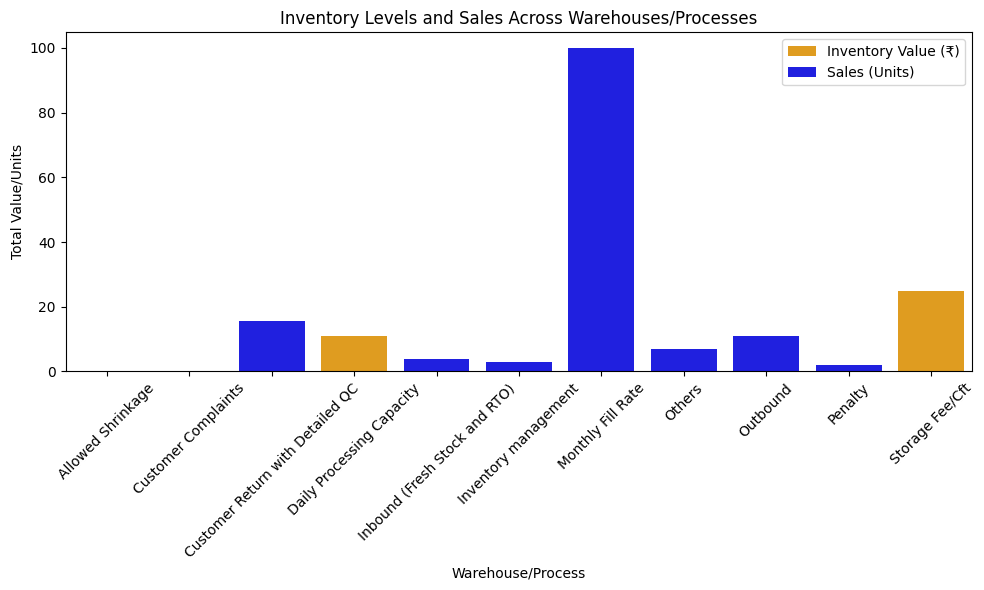

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Shiprocket', y='total_inventory_value', data=summary, color='orange', label='Inventory Value (₹)')
sns.barplot(x='Shiprocket', y='total_sales', data=summary, color='blue', label='Sales (Units)')
plt.title('Inventory Levels and Sales Across Warehouses/Processes')
plt.ylabel('Total Value/Units')
plt.xlabel('Warehouse/Process')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
summary['turnover_ratio'] = summary['total_sales'] / summary['total_inventory_value']


most_efficient = summary.loc[summary['turnover_ratio'].idxmax()]
print("Most Efficient Warehouse/Process:")
print(most_efficient)

Most Efficient Warehouse/Process:
Shiprocket               Allowed Shrinkage
total_inventory_value                  0.0
total_sales                            0.2
turnover_ratio                         inf
Name: 0, dtype: object


# **Expense IIGF:**
* #  Analyze monthly expenses related to inventory, infrastructure, and general facilities.
* #  Create visualizations to identify trends and suggest areas for cost reduction.

In [ ]:
Expense_df.head(10)

,index,Recived Amount,Unnamed: 1,Expance,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,06-19-22,1000,Large Bag,380
2,2,06-20-22,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
3,3,06-22-22,500,OLA,839
4,4,06-23-22,2000,Auto Rent,520
5,5,NaN,NaN,TT Fine,500
6,6,NaN,NaN,Bhushan Hotel,2506
7,7,NaN,NaN,Food,1290
8,8,NaN,NaN,Expomart Labour Charge,200
9,9,NaN,NaN,Choclate,400


In [ ]:
Expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           17 non-null     int64 
 1   Recived Amount  6 non-null      object
 2   Unnamed: 1      6 non-null      object
 3   Expance         15 non-null     object
 4   Unnamed: 3      17 non-null     object
dtypes: int64(1), object(4)
memory usage: 808.0+ bytes


# **International Sale Report:**
* ## Compare international sales data across different regions.
* ##  Identify the top-performing countries in terms of sales volume and revenue.

In [ ]:
international_sale_report_df

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...,...,...,...
37427,37427,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37428,37428,AVIN,03-31-22,Mar-22,PJNE3404,PJNE3404-KR-4XL,1.00,500.00,500.00,5.00
37429,37429,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37430,37430,AVIN,03-31-22,Mar-22,SET290,SET290-KR-DPT-M,1.00,812.50,812.00,7.00


In [ ]:
international_sale_report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37432 non-null  int64 
 1   DATE       37431 non-null  object
 2   Months     37407 non-null  object
 3   CUSTOMER   36392 non-null  object
 4   Style      36392 non-null  object
 5   SKU        34958 non-null  object
 6   Size       36392 non-null  object
 7   PCS        36392 non-null  object
 8   RATE       36392 non-null  object
 9   GROSS AMT  36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB


In [ ]:
# Convert necessary columns to numeric (coerce errors to handle invalid numbers)
international_sale_report_df['RATE'] = pd.to_numeric(international_sale_report_df['RATE'], errors='coerce')
international_sale_report_df['PCS'] = pd.to_numeric(international_sale_report_df['PCS'], errors='coerce')
international_sale_report_df['GROSS AMT'] = pd.to_numeric(international_sale_report_df['GROSS AMT'], errors='coerce')

# Remove rows where essential columns (like GROSS AMT or PCS) are missing
cleaned_sales_df = international_sale_report_df.dropna(subset=['RATE', 'PCS', 'GROSS AMT'])

In [ ]:
# Group by 'CUSTOMER' (assuming this is the region or country column)
sales_summary = cleaned_sales_df.groupby('CUSTOMER').agg(total_pcs_sold=('PCS', 'sum'), total_revenue=('GROSS AMT', 'sum')).reset_index()

# Sort by total revenue to get top-performing countries
top_countries = sales_summary.sort_values(by='total_revenue', ascending=False)

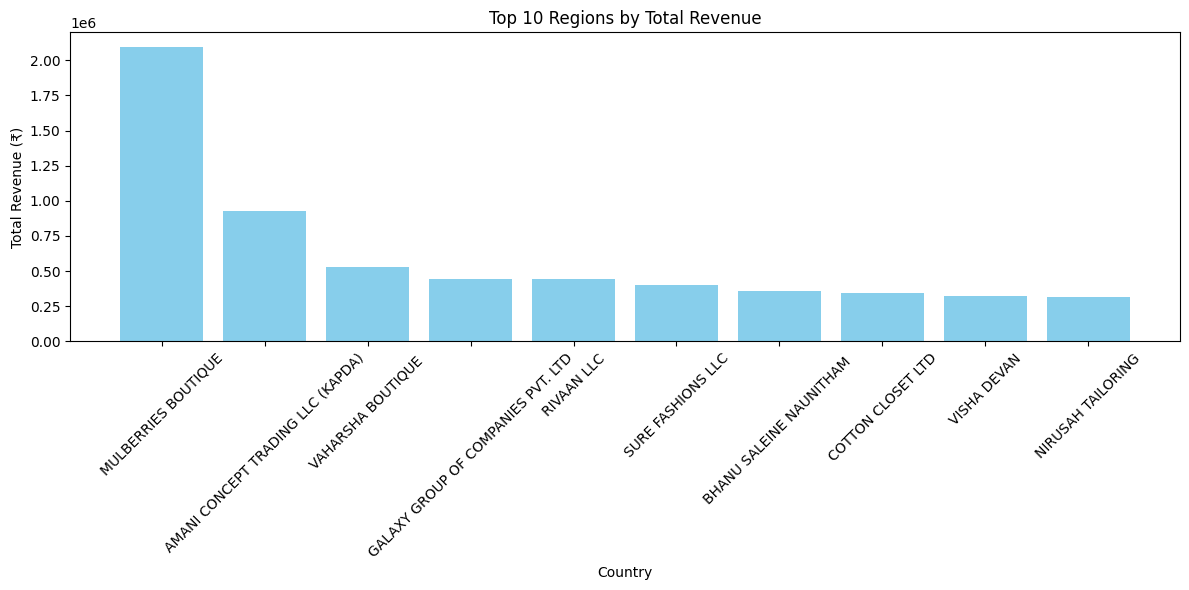

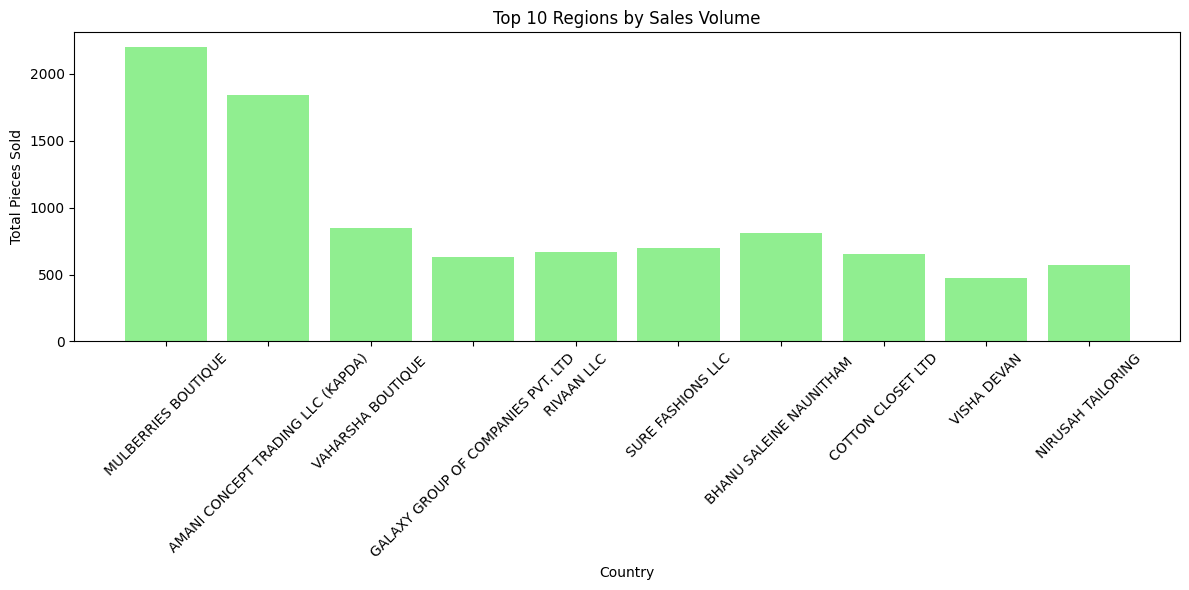

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(top_countries['CUSTOMER'][:10], top_countries['total_revenue'][:10], color='skyblue')
plt.title('Top 10 Regions by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_countries['CUSTOMER'][:10], top_countries['total_pcs_sold'][:10], color='lightgreen')
plt.title('Top 10 Regions by Sales Volume')
plt.xlabel('Country')
plt.ylabel('Total Pieces Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  **May-2022:**
* ##  Perform a detailed analysis of sales transactions for May 2022.
* ##  Compare with data from other months to identify seasonal trends or anomalies.

In [ ]:
May2022_df

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,Os326_M,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1326,1326,Os326_L,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1327,1327,Os326_XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1328,1328,Os326_2XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995


In [ ]:
May2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP              1330 non-null   object
 7   MRP Old         1330 non-null   object
 8   Final MRP Old   1330 non-null   object
 9   Ajio MRP        1330 non-null   object
 10  Amazon MRP      1330 non-null   object
 11  Amazon FBA MRP  1330 non-null   object
 12  Flipkart MRP    1330 non-null   object
 13  Limeroad MRP    1330 non-null   object
 14  Myntra MRP      1330 non-null   object
 15  Paytm MRP       1330 non-null   object
 16  Snapdeal MRP    1330 non-null   object
dtypes: int64(1), object(16)
memory usage: 176.8+ KB


In [ ]:
# Clean the data
May2022_df["Weight"] = pd.to_numeric(May2022_df["Weight"], errors="coerce")
May2022_df["Final MRP Old"] = pd.to_numeric(May2022_df["Final MRP Old"], errors="coerce")
May2022_df.dropna(subset=["Weight", "Final MRP Old"], inplace=True)

In [ ]:
# Sales Volume
sales_volume = May2022_df.groupby("Category")["Weight"].sum()

# Revenue Analysis
May2022_df["Total_Revenue"] = May2022_df["Weight"] * May2022_df["Final MRP Old"]
revenue_by_platform = May2022_df.groupby("Amazon FBA MRP")["Total_Revenue"].sum()

In [ ]:
# Average Selling Price
avg_selling_price = May2022_df["Final MRP Old"] / May2022_df["Weight"]

# Customer Behavior
customer_behavior = May2022_df.groupby("Style Id")["Total_Revenue"].agg(["sum", "count"])

# Product Performance
product_performance = May2022_df.groupby(["Sku", "Style Id"])["Weight"].sum().sort_values(ascending=False)

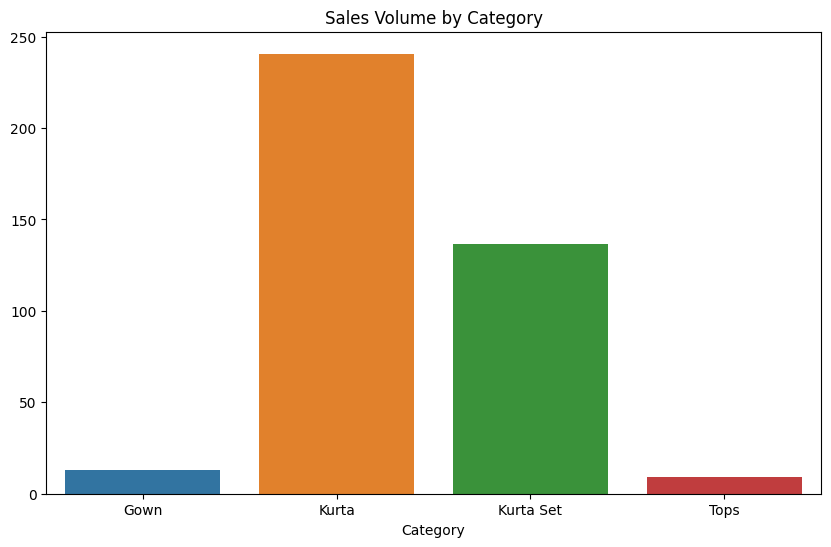

In [ ]:
# Sales Volume
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_volume.index, y=sales_volume.values)
plt.title("Sales Volume by Category")
plt.show()

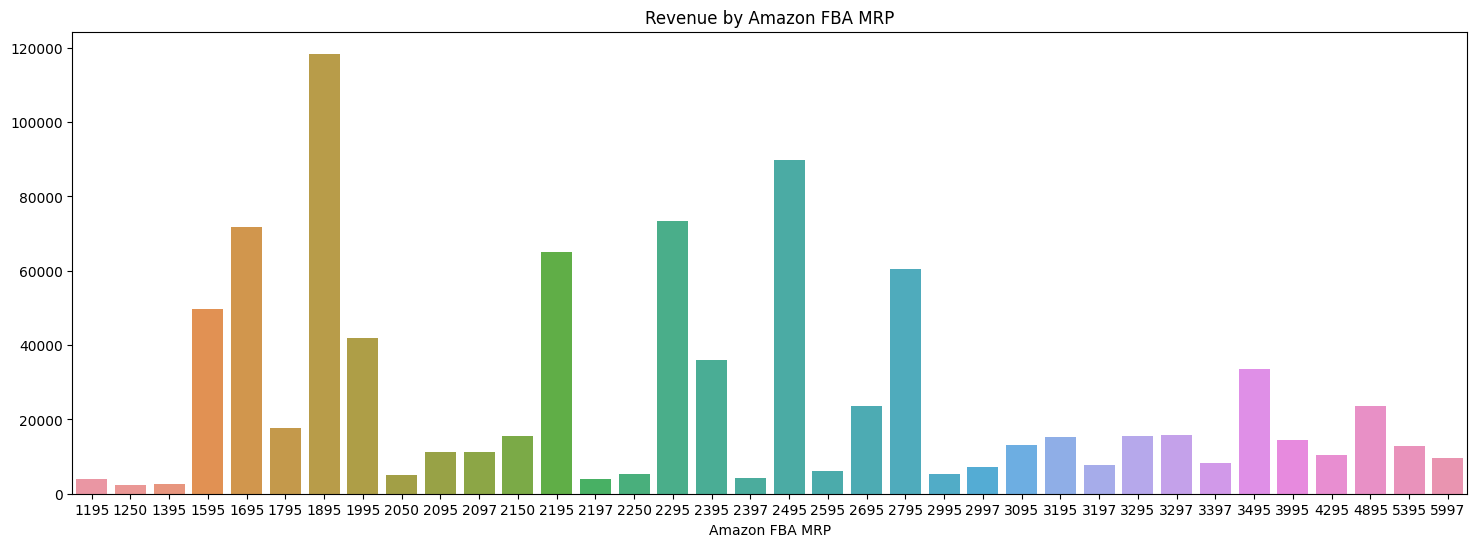

In [ ]:
# Revenue by Platform
plt.figure(figsize=(18, 6))
sns.barplot(x=revenue_by_platform.index, y=revenue_by_platform.values)
plt.title("Revenue by Amazon FBA MRP")
plt.show()

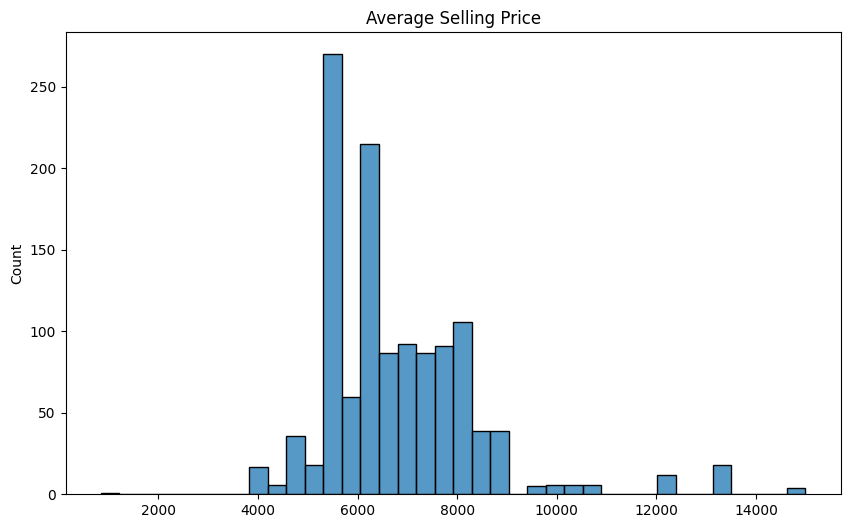

In [ ]:
# Average Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(avg_selling_price)
plt.title("Average Selling Price")
plt.show()

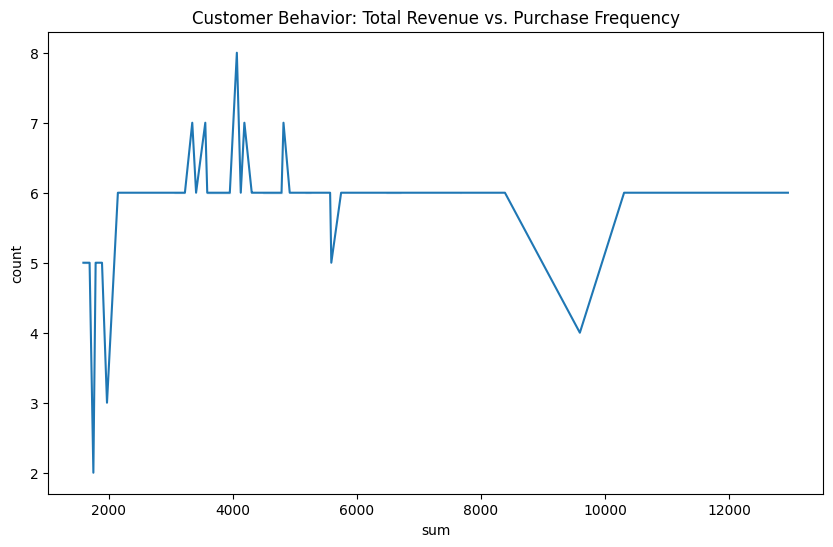

In [ ]:
# Customer Behavior
plt.figure(figsize=(10, 6))
sns.lineplot(x=customer_behavior["sum"], y=customer_behavior["count"])
plt.title("Customer Behavior: Total Revenue vs. Purchase Frequency")
plt.show()

# **PL March 2021.csv:**
* ##  Conduct a profit and loss analysis for March 2021.

* ##  Correlate the profit margins with specific sales campaigns or product launches during that period.

In [ ]:
PLMarch2021_df

,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,Os326_M,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1326,1326,Os326_L,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1327,1327,Os326_XL,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1328,1328,Os326_2XL,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995


In [ ]:
PLMarch2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP 1            1330 non-null   object
 7   TP 2            1330 non-null   object
 8   MRP Old         1330 non-null   object
 9   Final MRP Old   1330 non-null   object
 10  Ajio MRP        1330 non-null   object
 11  Amazon MRP      1330 non-null   object
 12  Amazon FBA MRP  1330 non-null   object
 13  Flipkart MRP    1330 non-null   object
 14  Limeroad MRP    1330 non-null   object
 15  Myntra MRP      1330 non-null   object
 16  Paytm MRP       1330 non-null   object
 17  Snapdeal MRP    1330 non-null   object
dtypes: int64

In [ ]:
# Clean the data
PLMarch2021_df["Weight"] = pd.to_numeric(PLMarch2021_df["Weight"], errors="coerce")
PLMarch2021_df["Final MRP Old"] = pd.to_numeric(PLMarch2021_df["Final MRP Old"], errors="coerce")
PLMarch2021_df.dropna(subset=["Weight", "Final MRP Old"], inplace=True)

In [ ]:
revenue_multiplier = 1.5  # Adjust this multiplier based on your business
PLMarch2021_df["Total_Revenue"] = PLMarch2021_df["Final MRP Old"] * revenue_multiplier

In [ ]:
cogs_percentage = 0.6  # Adjust this percentage based on your business
PLMarch2021_df["COGS"] = PLMarch2021_df["Final MRP Old"] * cogs_percentage

# Calculate profit
PLMarch2021_df["Profit"] = PLMarch2021_df["Total_Revenue"] - PLMarch2021_df["COGS"]

In [ ]:
# Profit and Loss Analysis
total_revenue = PLMarch2021_df["Total_Revenue"].sum()
total_cost = PLMarch2021_df["COGS"].sum()
net_profit = PLMarch2021_df["Profit"].sum()
profit_margin = (net_profit / total_revenue) * 100

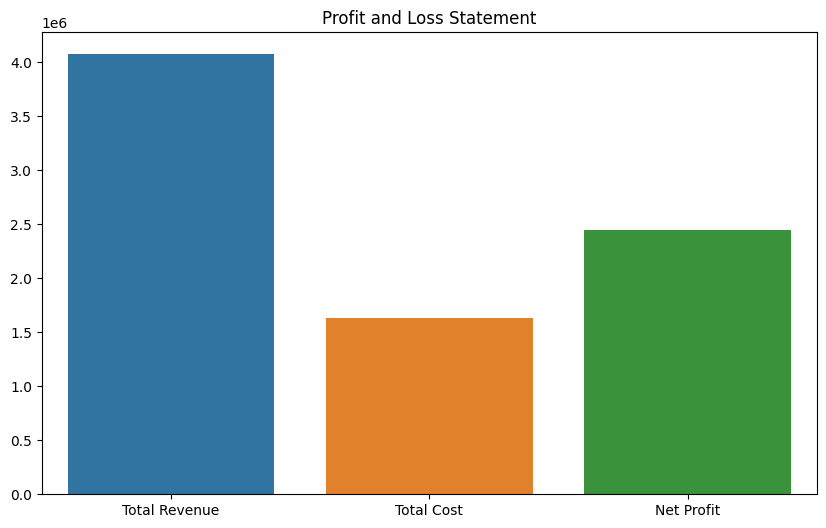

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=["Total Revenue", "Total Cost", "Net Profit"], y=[total_revenue, total_cost, net_profit])
plt.title("Profit and Loss Statement")
plt.show()


In [ ]:
# Strip whitespace from all column names
PLMarch2021_df.columns = PLMarch2021_df.columns.str.strip()


Total Profit/Loss for March 2021: 35175.0


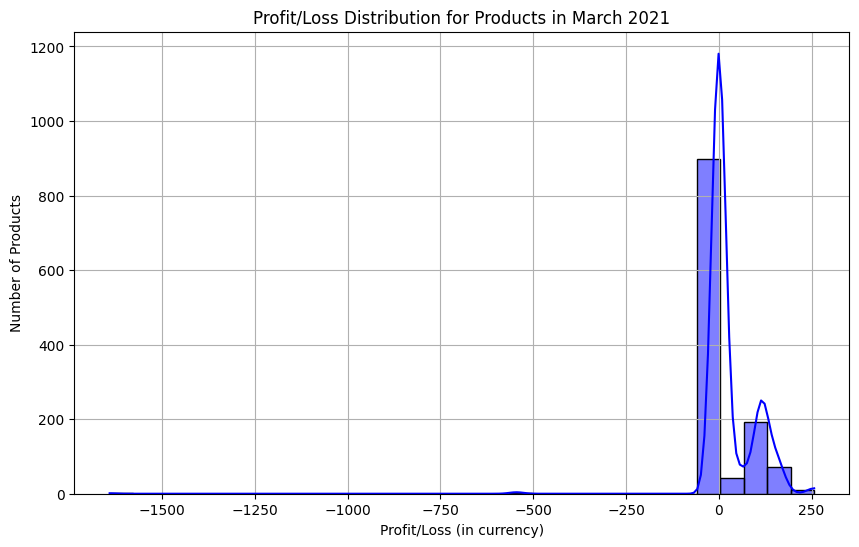

In [ ]:
PLMarch2021_df['Final MRP Old'] = pd.to_numeric(PLMarch2021_df['Final MRP Old'], errors='coerce')
PLMarch2021_df['MRP Old'] = pd.to_numeric(PLMarch2021_df['MRP Old'], errors='coerce')

# Step 1: Profit/Loss Calculation (Profit = Final MRP - MRP Old)
PLMarch2021_df['Profit/Loss'] = PLMarch2021_df['Final MRP Old'] - PLMarch2021_df['MRP Old']
total_profit_loss = PLMarch2021_df['Profit/Loss'].sum()
print(f"Total Profit/Loss for March 2021: {total_profit_loss}")

plt.figure(figsize=(10, 6))
sns.histplot(PLMarch2021_df['Profit/Loss'], bins=30, kde=True, color='blue')
plt.title('Profit/Loss Distribution for Products in March 2021')
plt.xlabel('Profit/Loss (in currency)')
plt.ylabel('Number of Products')
plt.grid(True)
plt.show()


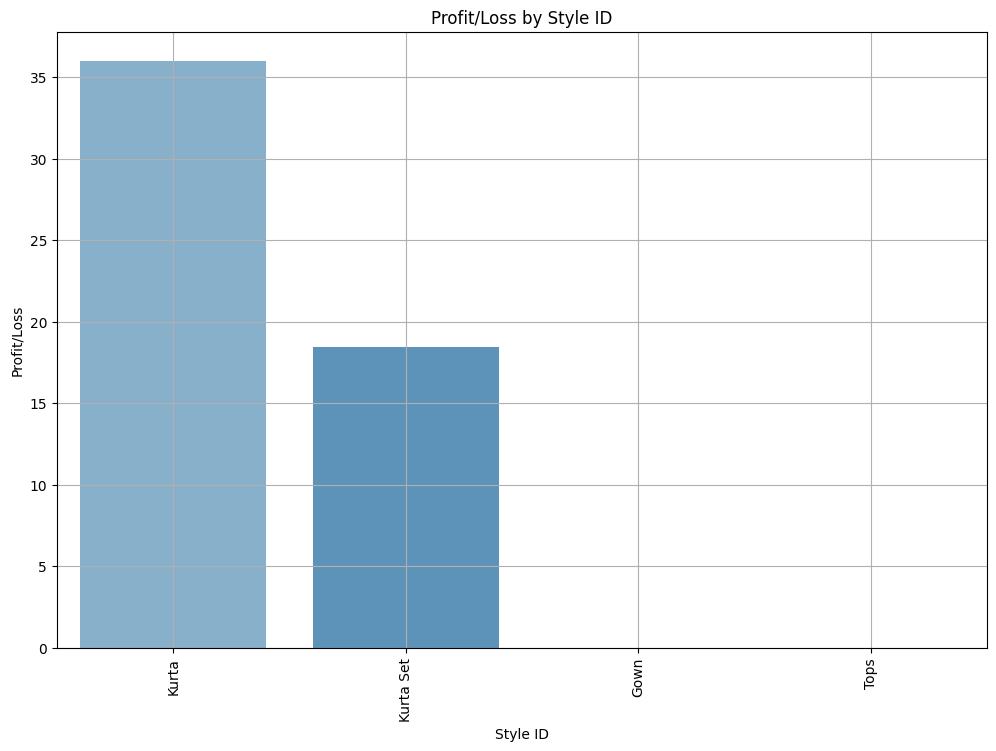

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=PLMarch2021_df, x='Category', y='Profit/Loss', ci=None, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Profit/Loss by Style ID')
plt.xlabel('Style ID')
plt.ylabel('Profit/Loss')
plt.grid(True)
plt.show()


# Sale Report.csv:
* #  Conduct an overall sales report analysis.
* #  Segment sales by product categories and analyze the sales performance of each category.

In [ ]:
Sale_report_df

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Sale_report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


In [ ]:
Sale_report_df_clean = Sale_report_df.dropna(subset=['SKU Code'])

In [ ]:
# Calculate total stock by product category
total_stock_by_category = Sale_report_df_clean.groupby('Category')['Stock'].sum().reset_index()
print("Total Stock by Category:")
print(total_stock_by_category)

Total Stock by Category:
                Category     Stock
0          AN : LEGGINGS     715.0
1                 BLOUSE    7925.0
2                 BOTTOM      41.0
3               CARDIGAN      58.0
4               CROP TOP     405.0
5   CROP TOP WITH PLAZZO     617.0
6                  DRESS   11675.0
7               JUMPSUIT      33.0
8                  KURTA  114333.0
9              KURTA SET   47682.0
10                 KURTI    1605.0
11         LEHENGA CHOLI     736.0
12            NIGHT WEAR    3288.0
13               PALAZZO     963.0
14                  PANT    3436.0
15                 SAREE    2777.0
16                   SET   24643.0
17               SHARARA    1190.0
18                 SKIRT     673.0
19                   TOP   16608.0
20                 TUNIC    2967.0


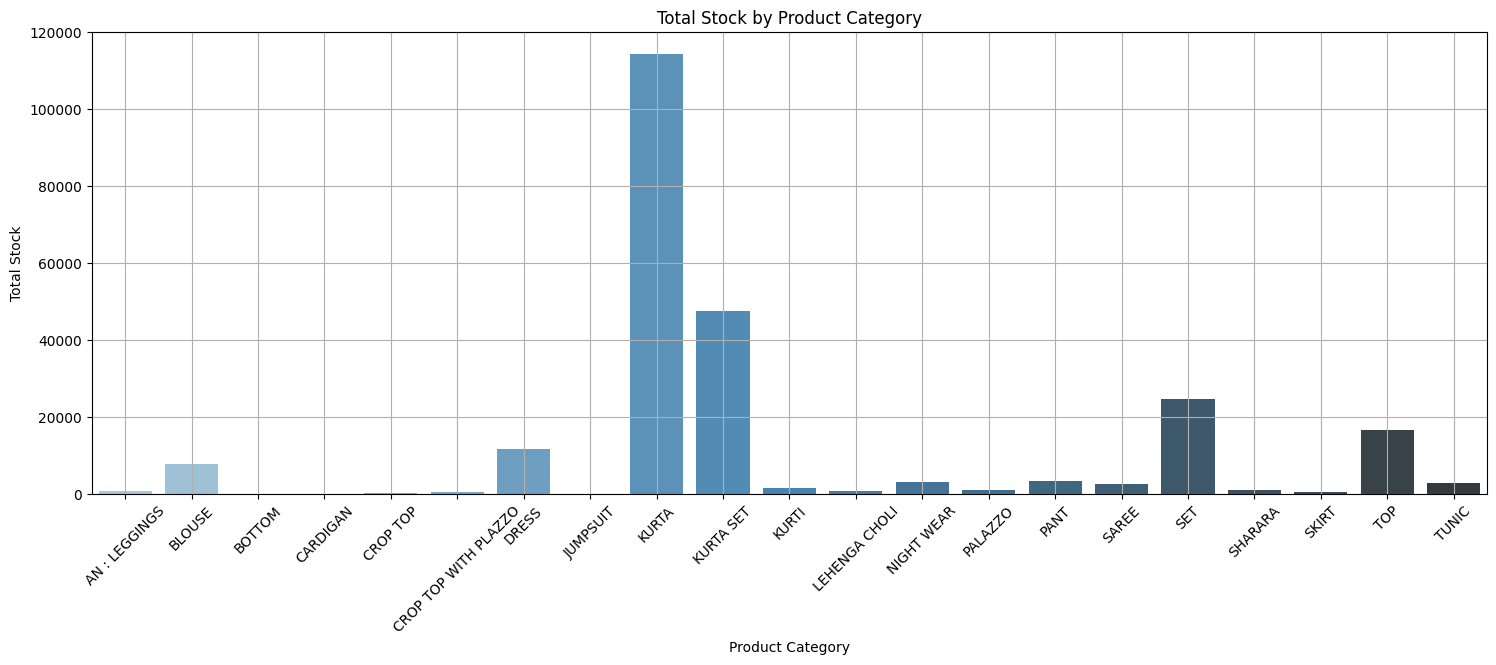

In [ ]:
# Step 3: Visualizing the Total Stock by Category
plt.figure(figsize=(18, 6))
sns.barplot(data=total_stock_by_category, x='Category', y='Stock', palette='Blues_d')
plt.title('Total Stock by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Stock')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

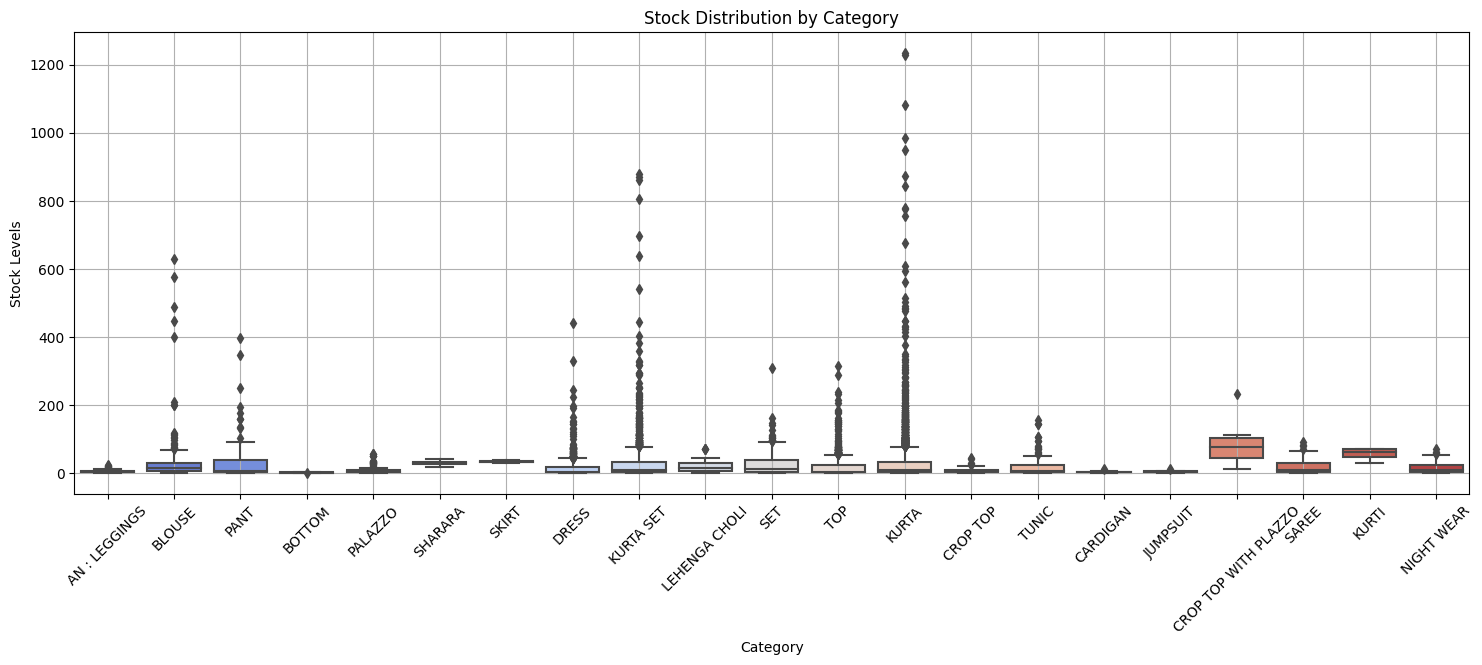

In [ ]:
# You can also visualize the stock distribution by size within each category

plt.figure(figsize=(18, 6))
sns.boxplot(data=Sale_report_df_clean, x='Category', y='Stock', palette='coolwarm')
plt.title('Stock Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Stock Levels')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Step 5: Additional Segmentation by Size and Category
stock_by_size_and_category = Sale_report_df_clean.groupby(['Category', 'Size'])['Stock'].sum().unstack().fillna(0)

print("Stock by Category and Size:")
print(stock_by_size_and_category)

Stock by Category and Size:
Size                    4XL    5XL     6XL    FREE        L        M        S  \
Category                                                                        
AN : LEGGINGS           0.0    0.0     0.0     0.0    138.0    129.0    179.0   
BLOUSE                  0.0    0.0     0.0  5058.0    504.0    568.0    530.0   
BOTTOM                  0.0    0.0     0.0     0.0      5.0      3.0      5.0   
CARDIGAN                0.0    0.0     0.0     0.0     10.0     11.0     13.0   
CROP TOP                0.0    0.0     0.0     0.0     40.0     30.0     57.0   
CROP TOP WITH PLAZZO    0.0    0.0     0.0     0.0    111.0    232.0     95.0   
DRESS                   0.0    0.0     0.0     0.0   1380.0   1649.0   2259.0   
JUMPSUIT                0.0    0.0     0.0     0.0      6.0      2.0      4.0   
KURTA                 897.0  993.0  1048.0     0.0  17278.0  17965.0  19283.0   
KURTA SET               0.0    0.0     0.0     0.0   5749.0   7978.0   9887.0   


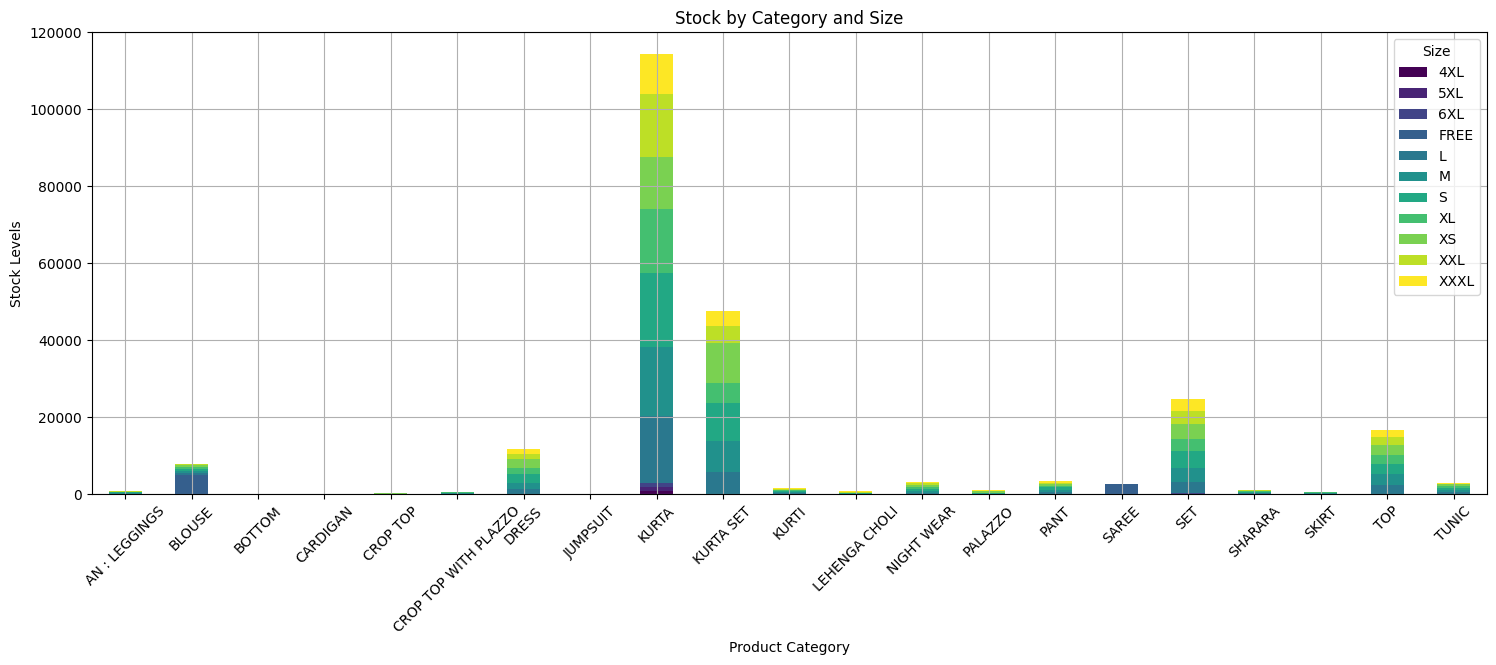

In [ ]:
# Step 6: Visualizing Stock by Category and Size
stock_by_size_and_category.plot(kind='bar', stacked=True, figsize=(18, 6), colormap='viridis')
plt.title('Stock by Category and Size')
plt.xlabel('Product Category')
plt.ylabel('Stock Levels')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.grid(True)
plt.show()